<a href="https://colab.research.google.com/github/mars241/Machine-Learning/blob/main/AAM_WCS_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

# Arbres de décision
Dans le cadre de ce défi, nous allons utiliser des arbres de décision dans le sens de la classification et de la régression et visualiser chacune de ces représentations. Dans ce défi, nous utiliserons le jeu de données `mpg`.

## Regression Trees

## Arbres de décision

In [4]:
# Load in the necessary libraries and the dataset
# Chargement des bibliothèques nécessaires et du jeu de données
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")

# Drop the rows with missing values
# Drop the "name" column
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2

# INSERT CODE HERE

# Supprimer les lignes avec des valeurs manquantes
# Supprimer la colonne "nom".
# Transformer la colonne "origine" pour représenter ce qui suit :
# USA = 0, Japon = 1, Europe = 2

# INSÉRER LE CODE ICI

In [2]:
# Voir la Data avant le traitement
data

# 9 colonnes & 398 lignes

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
# INSÉRER LE CODE ICI

# Supprimer les lignes avec des valeurs manquantes
# Donc supprimons les colonnes vides en utilisant axis=1 (par défaut axis=0, pour faire ici l'action sur les lignes),
# mieux de le faire sur les colonnes que sur les lignes , car il n'y a pas perte d'information:
data.dropna(axis=1, how='all')

# Supprimer la colonne "Name".
data.drop(columns=["name"], inplace=True)

# Transformer la colonne "origin" pour représenter ce qui suit :
# USA = 0, Japon = 1, Europe = 2
# Utilisons la factoirisation du Get dummies=Speudo-variables
data['origin'] = data['origin'].factorize()[0]
data



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


In [7]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%
# INSERT CODE HERE

# Diviser en deux parties (train et test) en utilisant la colonne "mpg" comme cible, un état aléatoire de 42 et une taille de test de 20%.
# INSÉRER LE CODE ICI

# La qualité du model dépend de la propreté du jeux de données,
# filtrons les "NaN" restantes notemment dans "horsepower" visible par exemple au 32eme enregistrement grâce au filtrage dans la BDD (baguette magique!)
data = data[data['horsepower'].notnull()]

# la cible (target) est "mpg"
y = data['mpg']

# Les 7 variables explicatives(9-1*name-1*target):
X = data[['cylinders', 'displacement', 'weight',  'horsepower', 'acceleration',	'model_year',	'origin']]

# Implémenter/entrainer le model selon les paramêtres voulus( un état aléatoire de 42 et une taille de test de 20% ):
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=42)

print("La longueur de l'ensemble de données initial est de :", len(X))
print("La longueur du dataset 'Train'(80% de la BDD initial) est  :", len(X_train))
print("La longueur du dataset 'Test'(20% de la BDD initial) est    :", len(X_test))

# Remarque: longeur(data)= 392 lignes((398-392)c-à-d 6 lignes ont été supprimées après le traitement de valeurs nulles!)


La longueur de l'ensemble de données initial est de : 392
La longueur du dataset 'Train'(80% de la BDD initial) est  : 313
La longueur du dataset 'Test'(20% de la BDD initial) est    : 79


In [8]:
# Fit a decision tree
# INSERT CODE HERE

# Ajuster un arbre de décision
# INSÉRER LE CODE ICI

# import des bibliothèques:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)


DecisionTreeRegressor()

In [9]:
# Predict on the xtest set
# INSERT CODE HERE

# Prédire sur l'ensemble xtest
# INSÉRER LE CODE ICI

modelDTR.predict(X_test)


array([23. , 19. , 31. , 33. , 27. , 27. , 11. , 31.5, 18. , 31. , 15. ,
       20. , 15.5, 29. , 17. , 26. , 18. , 32.3, 31.3, 34. , 23. , 36. ,
       31. , 17. , 31. , 28. , 19. , 18. , 26. , 25. , 16. , 20.2, 23.9,
       28. , 14. , 31. , 10. , 23. , 14. , 13. , 14. , 28. , 36. , 26. ,
       16. , 11. , 19. , 44.3, 25. , 33. , 14. , 21. , 21. , 34. , 38. ,
       16. , 15.5, 19. , 24. , 23. , 12. , 20.5, 28.8, 23.8, 24. , 26. ,
       25.5, 33. , 23.9, 14. , 25. , 14. , 22. , 19. , 20.5, 24. , 14. ,
       17. , 24. ])

In [13]:
# Print out the R2 score.
# INSERT CODE HERE

# Imprimer le score R2.
# INSÉRER LE CODE ICI

# TOPO sur le R2 / R²:
# R² c’est le pourcentage de variation de la variable de réponse qui est expliqué par un modèle linéaire. Ou R² = Variation expliquée / Variation totale
#Le R² (R-carré) est toujours compris entre 0 et 100%:
# 0 % indique que le modèle n’explique aucune de la variabilité des données de réponse autour de sa moyenne.
# 100% indique que le modèle explique toute la variabilité des données de réponse autour de sa moyenne.
# En général, plus le R-carré est élevé, meilleur est le modèle qui s’ajuste à vos données

# En statistique, le coefficient de détermination linéaire de Pearson, noté R² ou r², est une mesure de la qualité de la prédiction d'une régression linéaire,
# R² sert à Déterminer dans quelle mesure le modèle s’ajuste aux données :
# R2 du "Train" & "Test"
print(" R² du 'Train' est : ", modelDTR.score(X_train, y_train),"\n", "R² du 'Test' est :" , modelDTR.score(X_test, y_test) )

# Remarque : le coeff de l'entraînement /du "Train" est meilleur (est très près {même trop!} de 100%) ! Notre model semble bon {parfait}!

 R² du 'Train' est :  1.0 
 R² du 'Test' est : 0.7656344982870199


In [18]:
# Print each feature with importance %
# INSERT CODE HERE

# Imprimer chaque caractéristique avec son importance %
# INSÉRER LE CODE ICI

print("Les caractéristiques de chaques variables explicatives sont respectivement pour", "\n" 
      , " 'cylinders'; 'displacement'; 'weight';  'horsepower'; 'acceleration';	'model_year';	'origin':" , "\n" , modelDTR.feature_importances_)

# Remarques: Les meilleurs variables explicatives semblent dans l'ordre être "displacement" ; 'horsepower' & 'model_year'

Les caractéristiques de chaques variables explicatives sont respectivement pour 
  'cylinders'; 'displacement'; 'weight';  'horsepower'; 'acceleration';	'model_year';	'origin': 
 [0.00253069 0.6331713  0.06127306 0.17634224 0.02028824 0.10378444
 0.00261002]


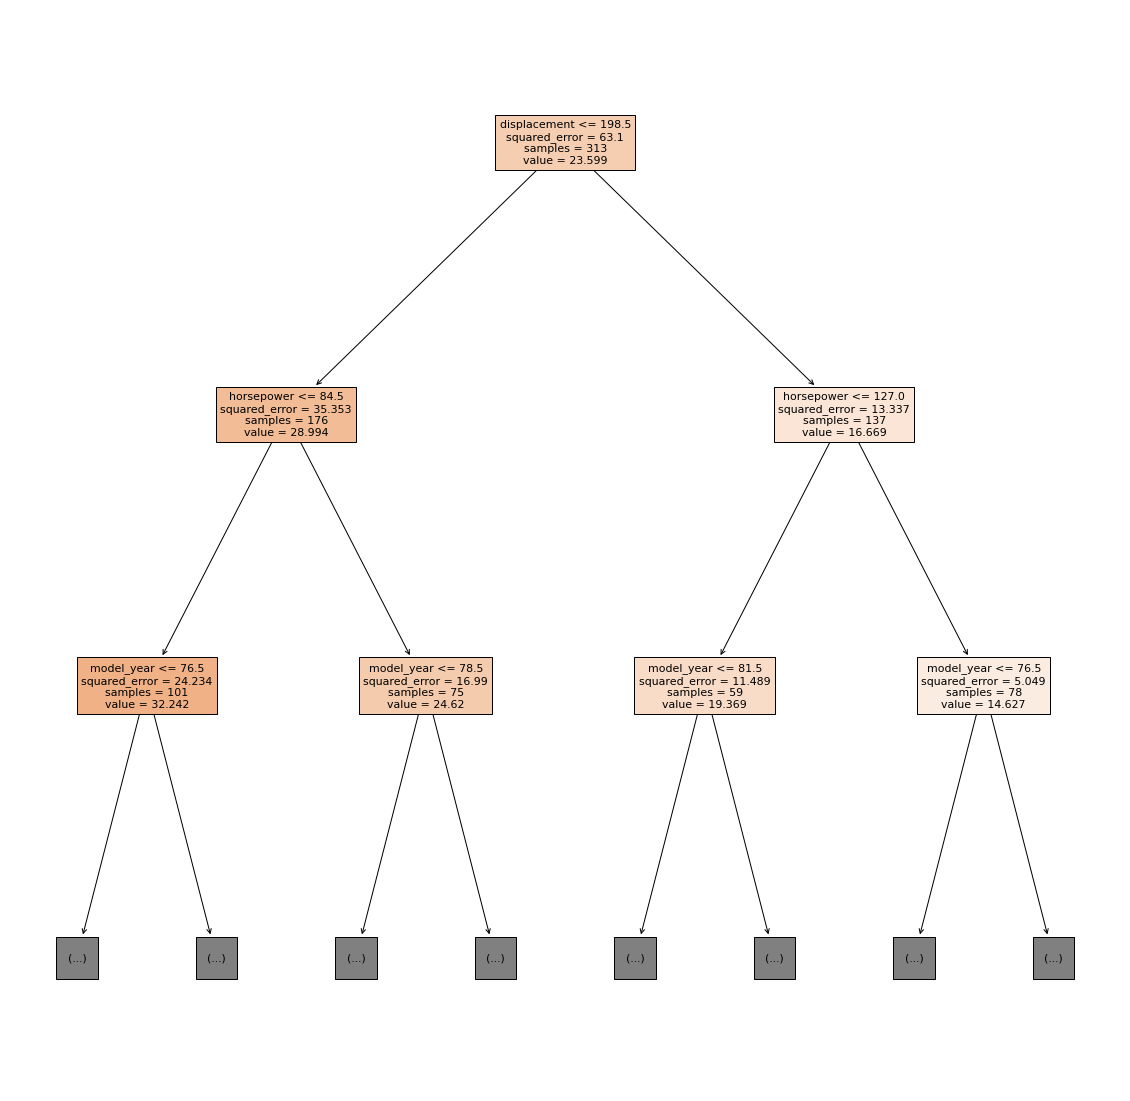

In [20]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE

# Tracer les résultats
# Utiliser les noms de colonnes comme noms d'entités et une max_depth de seulement 2
# INSÉRER LE CODE ICI

# import des bibliothèques:
from sklearn.tree import plot_tree

# Tracer de l'arbre de décision
plt.figure(figsize = (20,20))
plot_tree( modelDTR,
          filled = True, 
          feature_names=X_train.columns,
          max_depth = 2 )
plt.show()

# Du coup, l'arbre de décision s'appuie bien par "level"/"Niveau"/"step" sur les 3 variables citées ci-dessus:

## Classification Trees

In [21]:
# Load in the Penguins dataset
# Chargement de l'ensemble de données Pingouins
data_2 = sns.load_dataset('penguins')

# Drop rows with missing values
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2

# Turn the island column into numeric
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# INSERT CODE HERE

# Supprimer les lignes contenant des valeurs manquantes
# Transformer la colonne des espèces en valeurs numériques
# Spécifiquement, Adelie = 0, Chinstrap = 1, et Gentoo = 2

# Transformer la colonne en numérique
# Spécifiquement, Torgersen = 0, Biscoe = 1, Dream = 2

# INSÉRER LE CODE ICI


In [22]:
# Voir la Data avant le traitement
data_2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [23]:
# INSÉRER LE CODE ICI

# Drop rows with missing values
# Supprimer les lignes contenant des valeurs manquantes (par défaut axis=0, pour faire ici l'action sur les lignes)
data_2.dropna(axis=0, inplace=True)

# Turn the species column into numeric
# Transformer la colonne des espèces en valeurs numériques
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
# Spécifiquement, Adelie = 0, Chinstrap = 1, et Gentoo = 2
data_2['species'] = data_2['species'].factorize()[0]

# Turn the island column into numeric
# Transformer la colonne en numérique
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2
# Spécifiquement, Torgersen = 0, Biscoe = 1, Dream = 2
data_2['island'] = data_2['island'].factorize()[0]

data_2

# On a perdu 10 lignes/10 enregistrements dans le traitement des NaN, on passe de 344 à 333 lignes

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,Female
340,2,1,46.8,14.3,215.0,4850.0,Female
341,2,1,50.4,15.7,222.0,5750.0,Male
342,2,1,45.2,14.8,212.0,5200.0,Female


In [24]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets
# INSERT CODE HERE

# En utilisant un état aléatoire de 42 et une taille de test de 0.20, ainsi que "sex" comme résultat, divisé en ensembles d'entraînement et de test
# INSÉRER LE CODE ICI

y = data_2['sex']
X = data_2[['species',
          'island',
          'bill_length_mm',
          'bill_depth_mm',
       'flipper_length_mm',
       'body_mass_g',
       ]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 42, shuffle = True)

print("La longueur de l'ensemble de données initial est de :", len(X))
print("La longueur du dataset 'Train'(80% de la BDD initial) est  :", len(X_train))
print("La longueur du dataset 'Test'(20% de la BDD initial) est    :", len(X_test))

La longueur de l'ensemble de données initial est de : 333
La longueur du dataset 'Train'(80% de la BDD initial) est  : 266
La longueur du dataset 'Test'(20% de la BDD initial) est    : 67


In [33]:
# Using a random state of 42, fit the classification tree.
# INSERT CODE HERE

# En utilisant un état aléatoire de 42, ajuster l'arbre de classification.
# INSÉRER LE CODE ICI

modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# Print the predictions on the test set
# INSERT CODE HERE

# Imprimer les prédictions sur l'ensemble de test
# INSÉRER LE CODE ICI

modelDTC.predict(X_test)

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Female'], dtype=object)

In [27]:
# Accès aux colonnes
data_2.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [38]:
# Print the accuracy score for the predictions
# INSERT CODE HERE

# Imprimer le score de précision des prédictions
# INSÉRER LE CODE ICI

print(" R² du 'Train' est : ", modelDTC.score(X_train, y_train),"\n", "R² du 'Test' est :" , modelDTC.score(X_test, y_test))

 R² du 'Train' est :  1.0 
 R² du 'Test' est : 0.8507462686567164


In [40]:
# Print each feature with importance %
# INSERT CODE HERE

# Imprimer chaque caractéristique avec son importance %
# INSÉRER LE CODE ICI


print("Les caractéristiques de chaques variables explicatives sont respectivement pour", "\n" ,
      "'species'; 'island'; 'bill_length_mm'; 'bill_depth_mm';'flipper_length_mm'; 'body_mass_g'; 'sex'", "\n" , modelDTC.feature_importances_ )

# Remarques: 'island' est très mauvaise variable explicative( coeff proche de zéro)
# les 3 variables explicatives 'body_mass_g', 'bill_length_mm' & 'bill_depth_mm' semblent bien mieux !

Les caractéristiques de chaques variables explicatives sont respectivement pour 
 'species'; 'island'; 'bill_length_mm'; 'bill_depth_mm';'flipper_length_mm'; 'body_mass_g'; 'sex' 
 [0.01003925 0.         0.08651195 0.49038174 0.04108922 0.37197784]


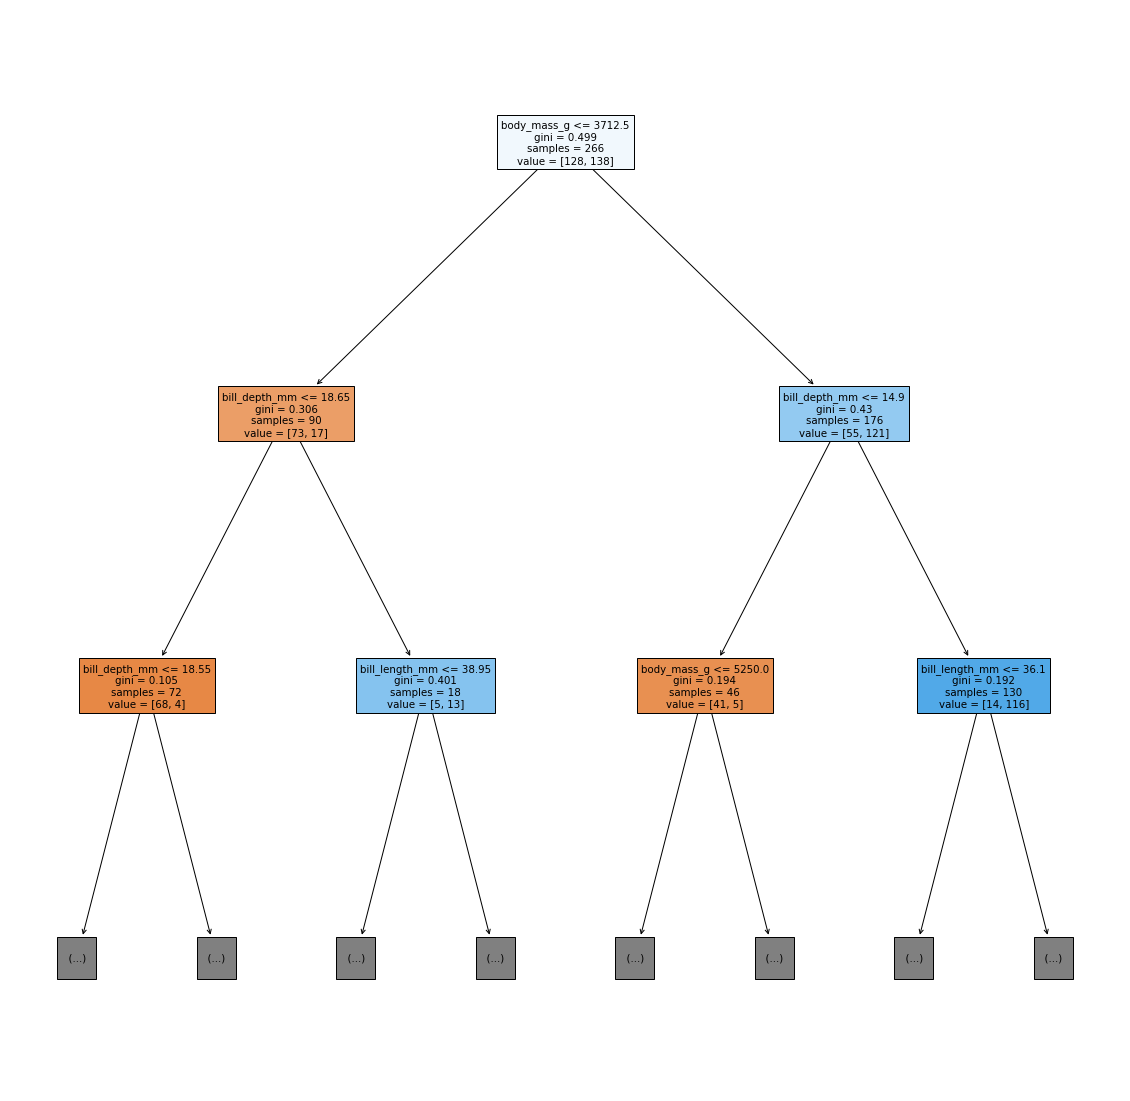

In [41]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE

# Tracer les résultats
# Utiliser les noms de colonnes comme noms d'entités et une max_depth de seulement 2
# INSÉRER LE CODE ICI

from sklearn.tree import plot_tree

plt.figure(figsize = (20,20))
plot_tree(modelDTC,
          filled = True, 
          feature_names=X_train.columns,
          max_depth = 2 )
plt.show()


# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Effets de la modification de la profondeur maximale
Dans cette section, nous allons voir comment la modification de la profondeur maximale, qui est l'un des hyperparamètres les plus importants pour les arbres de décision, joue un rôle dans la précision de la prédiction.

*** Cet exercice n'est fait que pour vous permettre de constater l'importance de l'impact du choix d'une profondeur maximale "max_depth" correcte!***

Le choix de la profondeur maximale correcte (ou de tout autre hyperparamètre d'ailleurs) est généralement effectué à l'aide de la validation croisée ou d'une technique plus avancée (recherche en grille, recherche aléatoire, optimisation bayésienne).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

À l'aide de l'ensemble de données ci-dessus, ajustez et prédisez les ensembles de formation et de test en utilisant un max_depth de 1 à 10. Par exemple, lors de la première itération, vous ajusterez les ensembles de données xtrain et ytrain en utilisant max_depth=1, prédirez le xtest à l'aide de ce modèle, puis enregistrerez la précision. Lors de l'itération suivante, le max_depth serait alors de 2, etc.

In [52]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

# En utilisant un état aléatoire de 42, ajuster plusieurs arbres de décision avec différentes profondeurs maximales.
# Enregistrer ces précisions dans une liste (i.e. list_of_accuracies.append(accuracy))
#list_of_accuracies = []
#for i in range(1, 11):

  # INSERT CODE HERE
  # INSÉRER LE CODE ICI

# import des bibliothèques:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

list_of_accuracies_train = []
list_of_accuracies_test = []
max_depth = range(1, 11)
for i in range(1, 11):

  modelDTC = DecisionTreeClassifier(random_state = 42, max_depth = i)
  modelDTC.fit(X_train, y_train)
  accuracy_train = modelDTC.score(X_train, y_train)
  accuracy_test = modelDTC.score(X_test, y_test)
  list_of_accuracies_train.append(accuracy_train)
  list_of_accuracies_test .append(accuracy_test)
print(f'les précisions du "test" arbre de decisions sont; "\n" {list_of_accuracies_test}')
print(f'les précisions du "train" arbre de decisions sont; "\n" {list_of_accuracies_train}')

#Remarques: les précisions du "test" et du "train" évoluent propotionellement

les précisions du "test" arbre de decisions sont; "
" [0.7014925373134329, 0.8208955223880597, 0.835820895522388, 0.8656716417910447, 0.835820895522388, 0.8059701492537313, 0.8656716417910447, 0.8805970149253731, 0.8805970149253731, 0.8805970149253731]
les précisions du "train" arbre de decisions sont; "
" [0.7293233082706767, 0.8947368421052632, 0.9285714285714286, 0.9360902255639098, 0.9586466165413534, 0.9736842105263158, 0.9887218045112782, 0.9924812030075187, 0.9962406015037594, 0.9962406015037594]


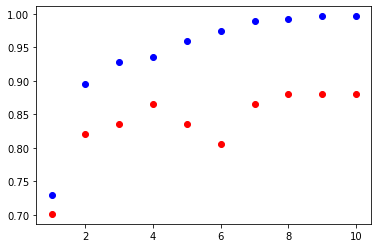

In [53]:
# Affichage des précisions conjointes du "train"&"test" de l'arbre de decisions:

# import la bibliothèque:
import matplotlib.pyplot as plt

# On choisie les nuages de points:
plt.scatter(range(1, 11), list_of_accuracies_test, color='red')
plt.scatter(range(1, 11), list_of_accuracies_train, color='blue')


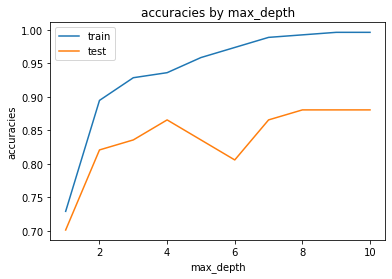

In [55]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE

# Tracer ces précisions à l'aide de matplotlib avec les précisions sur l'axe des y et la max_depth sur l'axe des x.
# INSÉRER LE CODE ICI

# import la bibliothèque:
import matplotlib.pyplot as plt

max_depth = range(1, 11)
plt.plot(max_depth,list_of_accuracies_train, label="train")
plt.plot(max_depth,list_of_accuracies_test, label="test")
plt.legend()
plt.title('accuracies by max_depth')
plt.ylabel('accuracies')
plt.xlabel('max_depth')
plt.show()